### Business Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime, timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
visits = pd.read_csv('visits_log_us.csv',
                    dtype={'Device': 'category'},
                    parse_dates=['Start Ts', 'End Ts'])

In [3]:
#Checking for duplicates
print('Duplicates:', visits.duplicated().sum())

Duplicates: 0


In [4]:
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [5]:
visits['Uid'] = visits['Uid'].apply(lambda x: '{:.6f}'.format(x))
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535979520.000000
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891744.000000
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831488.000000
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334209536.000000
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681728.000000


In [6]:
visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

The dataframe seems fine. There are no duplicates or missing values

In [7]:
orders = pd.read_csv('orders_log_us.csv',
                    parse_dates=['Buy Ts'])

In [8]:
#Checking for duplicates
print('Duplicates:', orders.duplicated().sum())

Duplicates: 0


In [9]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [10]:
orders['Uid'] = orders['Uid'].apply(lambda x: '{:.6f}'.format(x))
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727168.000000
1,2017-06-01 00:25:00,0.55,11627257723692906496.000000
2,2017-06-01 00:27:00,0.37,17903680561304213504.000000
3,2017-06-01 00:29:00,0.55,16109239769442553856.000000
4,2017-06-01 07:58:00,0.37,14200605875248379904.000000


In [11]:
#Checking for NA's
orders.isnull().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [12]:
print('Zero-revenue orders:', len(orders[orders['Revenue'] == 0]))

Zero-revenue orders: 51


In [13]:
#Removing zero revenue orders from the dataset
orders = orders.drop(orders[orders.Revenue == 0].index)
print('Zero-revenue orders:', len(orders[orders['Revenue'] == 0]))

Zero-revenue orders: 0


In [14]:
costs = pd.read_csv('costs_us.csv',
                    parse_dates=['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [15]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [16]:
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [17]:
print('Duplicates:', orders.duplicated().sum())

Duplicates: 0


### Metrics and Calculations

In [18]:
visits['start_ts_year']  = visits['Start Ts'].dt.year
visits['start_ts_month'] = visits['Start Ts'].dt.month
visits['start_ts_week']  = visits['Start Ts'].dt.week
visits['start_ts_date'] = visits['Start Ts'].dt.date

C:\Users\munaf\AppData\Local\Temp/ipykernel_1264/1253288440.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visits['start_ts_week']  = visits['Start Ts'].dt.week


In [19]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,start_ts_year,start_ts_month,start_ts_week,start_ts_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535979520.000000,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891744.000000,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831488.000000,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334209536.000000,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681728.000000,2017,12,52,2017-12-27


In [20]:
#Calculating daily active users by date
dau_total = visits.groupby(['start_ts_date']).agg({'Uid': 'nunique'}).reset_index()
dau_total.columns = ['date', 'dau']
dau_total.head()

,date,dau
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


In [21]:
print('Average daily users:', round(dau_total['dau'].mean()))

Average daily users: 908


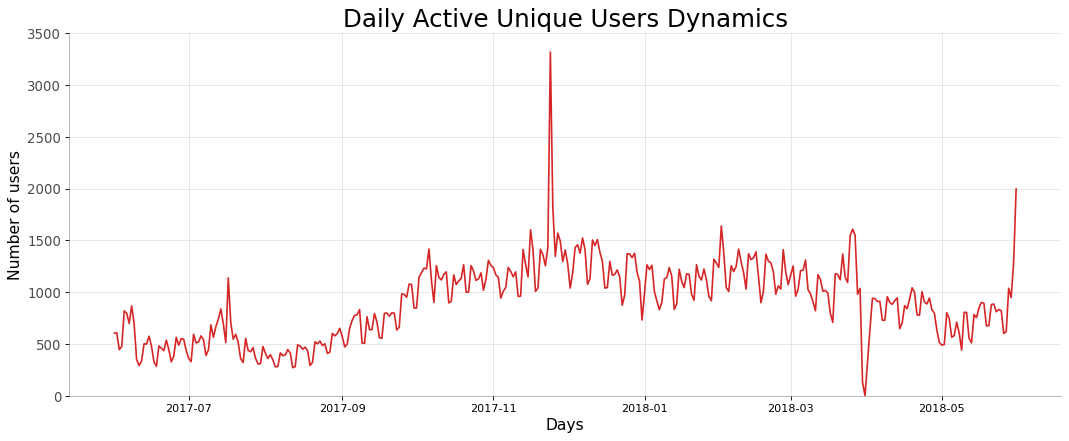

In [22]:
plt.figure(figsize=(16,6), dpi= 80)
plt.plot('date', 'dau', data=dau_total, color='tab:red')

plt.ylim(0, 3500)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Daily Active Unique Users Dynamics", fontsize=22)
plt.grid(axis='both', alpha=.3)

plt.xlabel('Days', fontsize = 14)
plt.ylabel('Number of users', fontsize = 14)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

In December there was a significant increase in daily users number. 
Alternatively in April there was some kind of break-down - or the system was working but not collecting data (need report to data collection team) or the whole serivce wasnt available for the users at all.
in the end of May another growth happened, but we dont see whether it countinued or not. Seems to be seasonal as soon as summer starts and people look for the ways to spend their free time.

In [23]:
visits['day_of_week'] = visits['Start Ts'].dt.weekday

In [24]:
visits['first_day_of_the_week'] = visits['Start Ts'] - visits['day_of_week'] * timedelta(days=1)
visits['first_day_of_the_week'] = visits['first_day_of_the_week'].dt.date

In [25]:
#Calculating weekly active users
wau_total = visits.groupby(['first_day_of_the_week']).agg({'Uid': 'nunique'}).reset_index()
wau_total.columns = ['week', 'wau']
wau_total.head()

,week,wau
0,2017-05-29,2021
1,2017-06-05,4129
2,2017-06-12,2812
3,2017-06-19,2878
4,2017-06-26,3064


In [26]:
print('Average weekly users:', round(wau_total['wau'].mean()))

Average weekly users: 5716


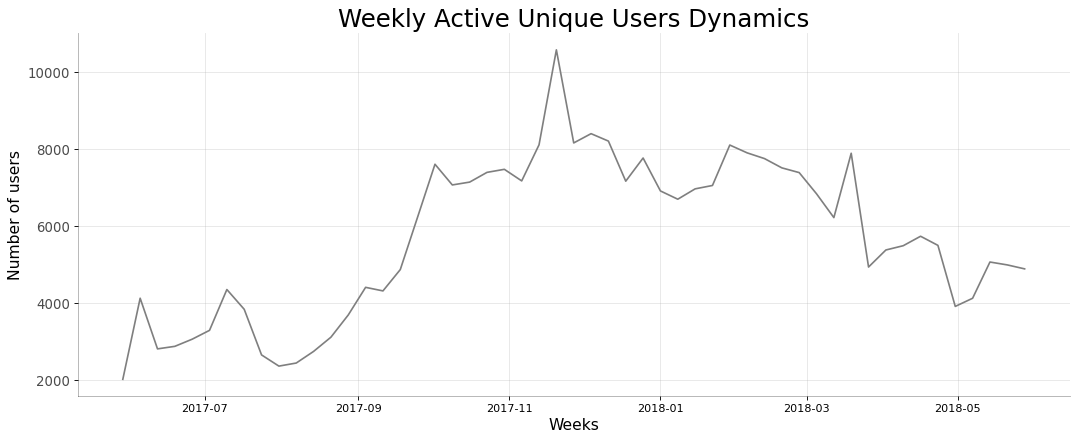

In [27]:
# Draw Plot
plt.figure(figsize=(16,6), dpi= 80)
plt.plot('week', 'wau', data=wau_total, color='tab:grey')

plt.yticks(fontsize=12, alpha=.7)
plt.title("Weekly Active Unique Users Dynamics", fontsize=22)
plt.grid(axis='both', alpha=.3)

plt.xlabel('Weeks', fontsize = 14)
plt.ylabel('Number of users', fontsize = 14)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

There was a general rise in the number of users at the end of 2017 and the beginning of 2018.

In [28]:
visits['month_year'] = pd.to_datetime(visits['Start Ts']).dt.to_period('M')

In [29]:
#Calculating monthly active users
mau_total = visits.groupby(['month_year']).agg({'Uid': 'nunique'})
mau_total.columns = ['mau']
mau_total.head()

,mau
month_year,
2017-06,13259
2017-07,14183
2017-08,11631
2017-09,18975
2017-10,29692


In [30]:
print('Average montly users:', round(mau_total['mau'].mean()))

Average montly users: 23228


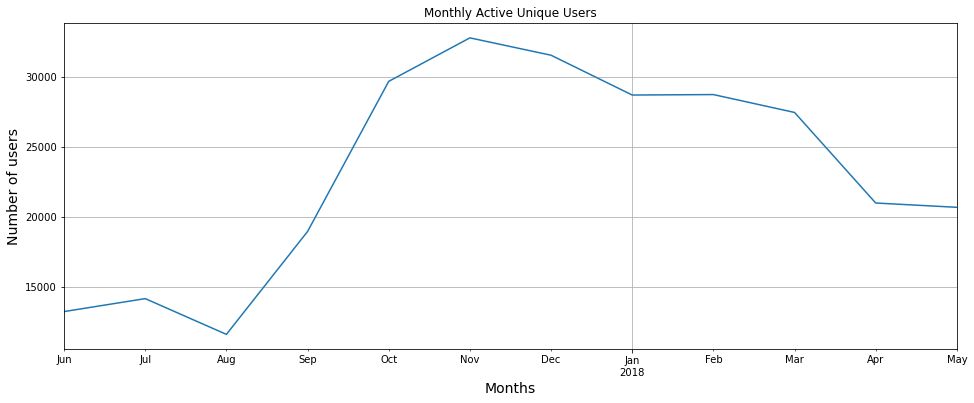

In [31]:
mau_total.plot(y='mau',
               kind='line',
               figsize=(16,6), 
               title = 'Monthly Active Unique Users',
               grid = True,
               legend = False)
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Number of users', fontsize = 14)
plt.show()

On this graph we see the some confirmation of assumptions made with daily users dynamics - The winter is 'high-season' for Afisha users, summer was 'low-season' in 2017

### Number of sessions

In [32]:
sessions_per_day = visits.groupby(['start_ts_date']).agg({'Uid': 'count'}).reset_index()
sessions_per_day.columns = ['date', 'n_sessions']
sessions_per_day.head()

,date,n_sessions
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893


In [33]:
print('Average sessions per day:', round(sessions_per_day['n_sessions'].mean()))

Average sessions per day: 987


In [34]:
daily_sessions = visits.pivot_table(index='start_ts_date', columns='Device', values='Uid', aggfunc='count')
daily_sessions.columns = ['desktop', 'touch']
daily_sessions.head()

,desktop,touch
start_ts_date,,
2017-06-01,501,163
2017-06-02,498,160
2017-06-03,329,148
2017-06-04,349,161
2017-06-05,693,200


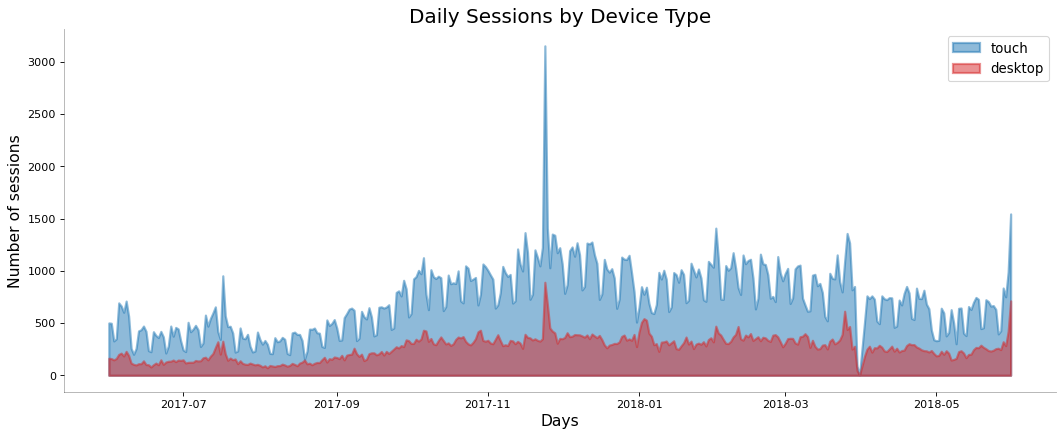

In [35]:
# Prepare Data
x = daily_sessions.index.values.tolist()
y1 = daily_sessions['desktop'].values.tolist()
y2 = daily_sessions['touch'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = ['desktop', 'touch']

# Draw Plot 
fig, ax = plt.subplots(1, 1, figsize=(16,6), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)

# Decorations
ax.set_title('Daily Sessions by Device Type', fontsize=18)
ax.legend(loc='best', fontsize=12)
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Number of sessions', fontsize = 14)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()

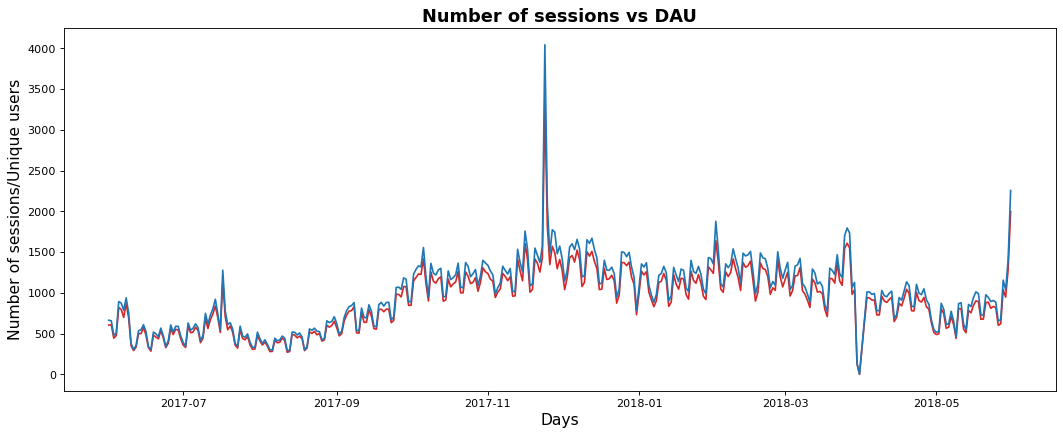

In [36]:
sessions_dau = sessions_per_day.merge(dau_total, on='date')
plt.figure(figsize=(16,6), dpi= 80)
plt.plot('date', 'dau', data=sessions_dau, color='tab:red')
plt.plot('date', 'n_sessions', data=sessions_dau, color='tab:blue')
plt.title("Number of sessions vs DAU", fontsize=16, fontweight='bold')
ax.legend(loc = 'best',fontsize = 14)
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Number of sessions/Unique users', fontsize = 14)

plt.show()

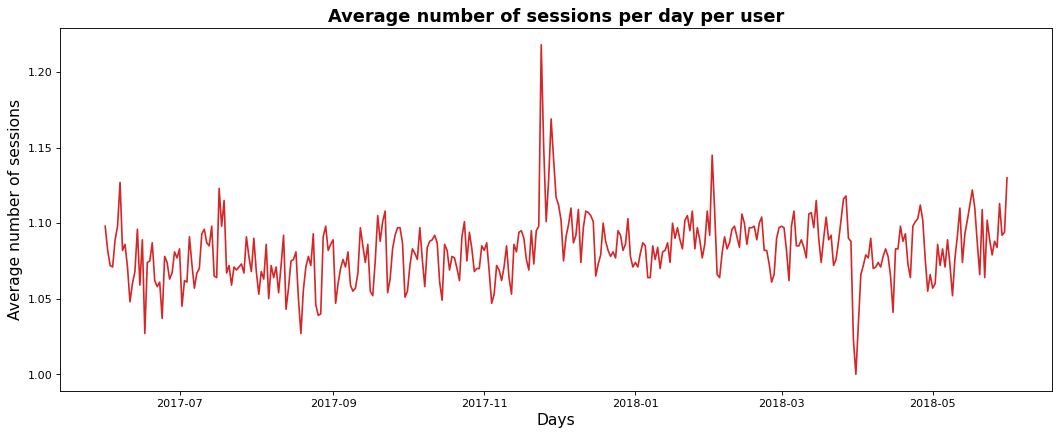

In [37]:
sessions_dau['average_n_sessions'] = (sessions_dau['n_sessions']/sessions_dau['dau']).round(3)
plt.figure(figsize=(16,6), dpi= 80)
plt.plot('date', 'average_n_sessions', data=sessions_dau, color='tab:red')
plt.title("Average number of sessions per day per user", fontsize=16, fontweight='bold')
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Average number of sessions', fontsize = 14)
plt.show()

In [38]:
print('Average sessions per day per user:', round(sessions_dau['average_n_sessions'].mean(), 1))

Average sessions per day per user: 1.1


### Average Session Length

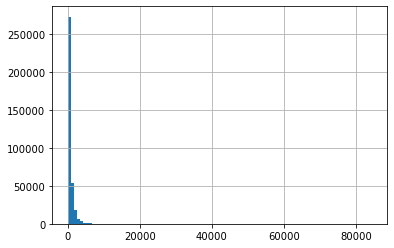

In [39]:
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
visits['session_duration_sec'].hist(bins=100)
plt.show()

In [40]:
print('The most frequent duration of one session:')
visits['session_duration_sec'].mode()

The most frequent duration of one session:


0    60
dtype: int64

In [41]:
print('The average duration of one session:')
visits['session_duration_sec'].mean()

The average duration of one session:


643.506488592098

In [42]:
print('Median duration of one session:', visits['session_duration_sec'].median())

Median duration of one session: 300.0


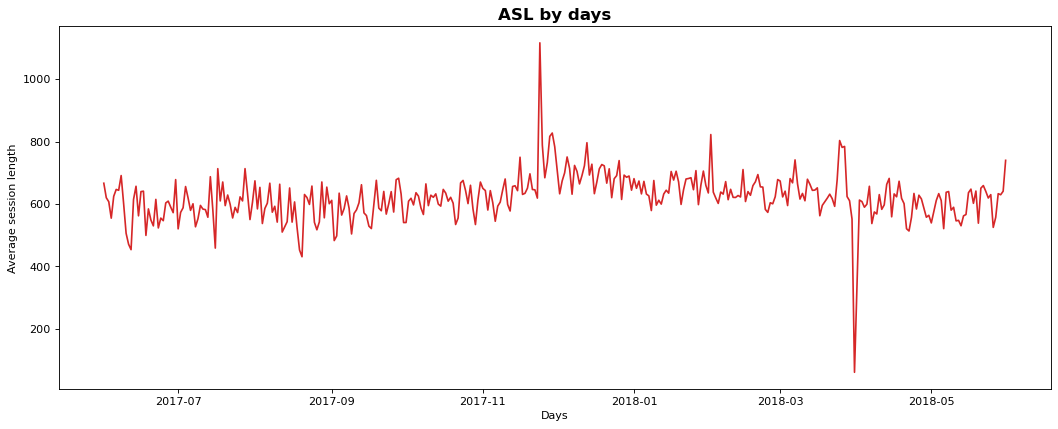

In [43]:
#Plotting average session length per day
asl_per_day = visits.groupby(['start_ts_date']).agg({'session_duration_sec':'mean'}).reset_index()
plt.figure(figsize=(16,6), dpi= 80)
plt.plot('start_ts_date', 'session_duration_sec', data=asl_per_day, color='tab:red')
plt.title("ASL by days", fontsize=15, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Average session length')
plt.show()

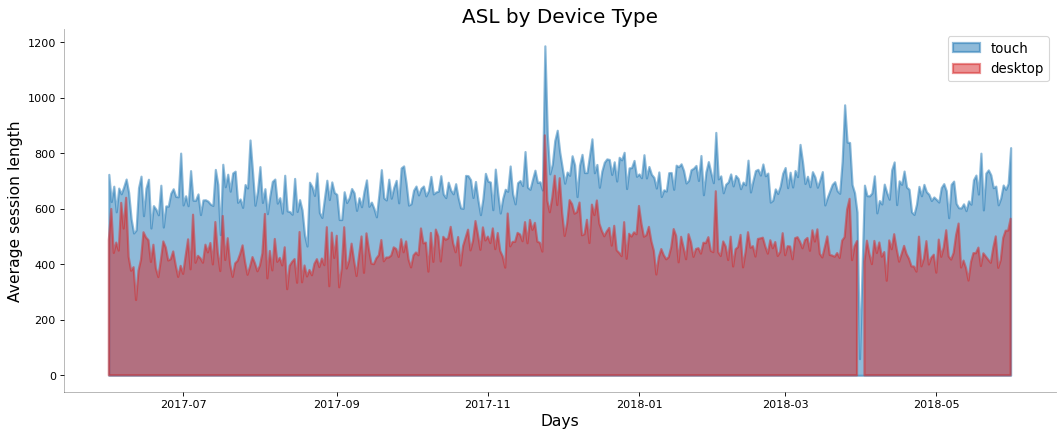

In [44]:
#Plotting average session length by device
asl_by_device = visits.pivot_table(index='start_ts_date', columns='Device', values='session_duration_sec', aggfunc='mean')
asl_by_device.columns = ['desktop', 'touch']
# Prepare Data
x = asl_by_device.index.values.tolist()
y1 = asl_by_device['desktop'].values.tolist()
y2 = asl_by_device['touch'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = ['desktop', 'touch']

# Draw Plot 
fig, ax = plt.subplots(1, 1, figsize=(16,6), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)

# Decorations
ax.set_title('ASL by Device Type', fontsize=18)
ax.legend(loc='best', fontsize=12)
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Average session length', fontsize = 14)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()

The median average session length is 300sec. It means that 50% of users spend in the service 5 min and less. Users with mobile devices tend to spend more time for one session - does it mean that mobile interface is more difficult for users or does it offer more functions than desktop and users are more involved?

### Retention Rate

In [45]:
first_activity_date = visits.groupby(['Uid'])['Start Ts'].min()
first_activity_date.name = 'first_activity_date'

In [46]:
visits = visits.join(first_activity_date, on='Uid')

In [47]:
visits['activity_month'] = visits['Start Ts'].astype('datetime64[M]')
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')

In [48]:
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round(0).astype(int)

In [49]:
cohorts = visits.groupby(['first_activity_month', 'cohort_lifetime']).agg({'Uid' : 'nunique'}).reset_index()

In [50]:
initial_users_count = cohorts[cohorts['cohort_lifetime']==0][['first_activity_month', 'Uid']]
initial_users_count = initial_users_count.rename(columns={'Uid' : 'cohort_users'})
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')

In [51]:
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users']
cohorts.head()

,first_activity_month,cohort_lifetime,Uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


In [52]:
cohorts_2017 = cohorts[(cohorts['first_activity_month'].dt.year == 2017) & (cohorts['cohort_lifetime'] !=0)].reset_index()
cohorts_2018 = cohorts[(cohorts['first_activity_month'].dt.year == 2018) & (cohorts['cohort_lifetime'] !=0)].reset_index()

In [53]:
retention_pivot_2017 = cohorts_2017.pivot_table(
                                index='first_activity_month',
                                columns='cohort_lifetime',
                                values='retention',
                                aggfunc='sum')

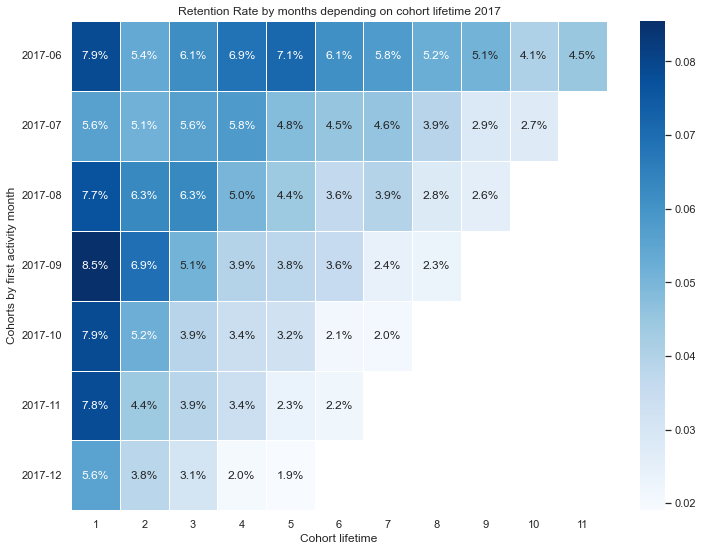

In [54]:
plt.figure(figsize=(12,9))
sns.set(style='white')
plt.title('Retention Rate by months depending on cohort lifetime 2017')

sns.heatmap(retention_pivot_2017,
            annot=True,
            fmt='.1%',
            linewidths=1,
            linecolor='white',
            cmap='Blues').set_yticklabels(retention_pivot_2017.index.strftime('%Y-%m'))
plt.xlabel('Cohort lifetime')
plt.ylabel('Cohorts by first activity month')
plt.show()

In [55]:
retention_pivot_2018 = cohorts_2018.pivot_table(
                                index='first_activity_month',
                                columns='cohort_lifetime',
                                values='retention',
                                aggfunc='sum')

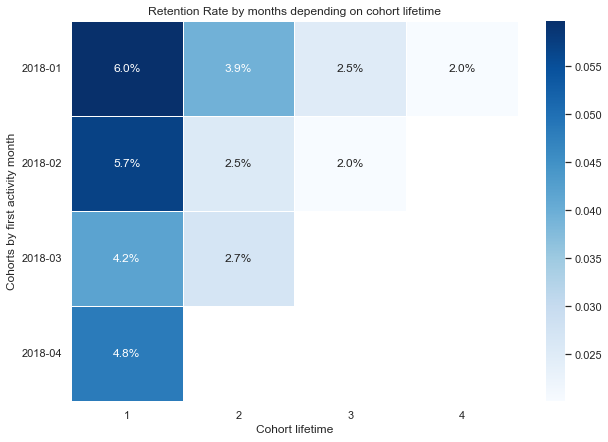

In [56]:
plt.figure(figsize=(10,7))
sns.set(style='white')
plt.title('Retention Rate by months depending on cohort lifetime')
sns.heatmap(retention_pivot_2018,
            annot=True,
            fmt='.1%',
            linewidths=1,
            linecolor='white',
            cmap='Blues').set_yticklabels(retention_pivot_2018.index.strftime('%Y-%m'))
plt.xlabel('Cohort lifetime')
plt.ylabel('Cohorts by first activity month')
plt.show()

I have divided users by cohorts depending on the month when they firstly very active on the website and regarded them separately for two years. 

In 2017 the June and July cohorts seem to be loyal and constant users of Afisha. August, September, October cohorts seemed to have good starts but then decreased their usage.

In 2018 there was a good start after December boom, but sadly it went down pretty fast. Also as we see results of 2018 is little bit lower than ones in 2017 which could mean that regardless of big increase in number of users their retention rate is not that satisfactory.

### Sales

#### Conversion
When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d and so on.

In [57]:
orders['order_date'] = orders['Buy Ts'].dt.date
first_orders = orders.groupby(['Uid']).agg({'order_date':'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order']

In [58]:
first_visit = visits.groupby(['Uid']).agg({'start_ts_date':'min'}).reset_index()
first_visit.columns = ['Uid', 'first_visit']

In [59]:
conversion = first_orders.merge(first_visit, on='Uid')
conversion['conversion'] = (conversion['first_order'] - conversion['first_visit'])/np.timedelta64(1, 'D')

In [60]:
def conversion_group(conversion):
    if conversion == 0:
        return 'Conversion 0d'
    if  1 <= conversion <= 7:
        return 'Conversion 7d'
    if  8 <= conversion <= 14:
        return 'Conversion 14d'
    if  15 <= conversion <= 30:
        return 'Conversion 30d'
    return 'Conversion 30d+'

In [61]:
conversion['conversion_group'] = conversion['conversion'].apply(conversion_group)
conversion['conversion_group'].value_counts()

Conversion 0d      25025
Conversion 30d+     4935
Conversion 7d       4297
Conversion 30d      1277
Conversion 14d       975
Name: conversion_group, dtype: int64

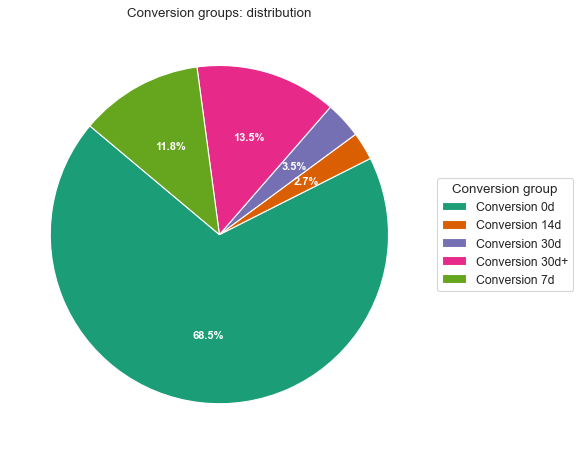

In [62]:
# Prepare Data
conversion_groups = conversion.groupby('conversion_group').size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = conversion_groups['counts']
categories = conversion_groups['conversion_group']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                  startangle=140)

ax.legend(wedges, categories, title="Conversion group", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Conversion groups: distribution")
plt.show()

In [63]:
visits1 = pd.merge(visits, conversion, how='inner', on='Uid')

In [64]:
conversions_sources = pd.crosstab(visits1['Source Id'],visits1['conversion_group']).apply(lambda r: r/r.sum(), axis=1)
conversions_sources = conversions_sources[['Conversion 0d',
                                           'Conversion 7d',
                                           'Conversion 14d',
                                           'Conversion 30d',
                                           'Conversion 30d+']]

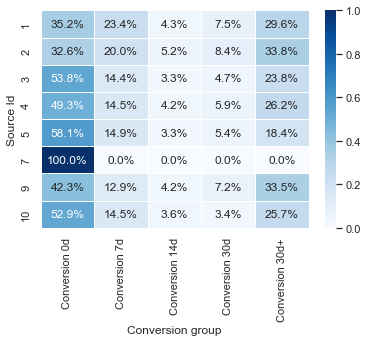

In [65]:
sns.heatmap(conversions_sources,
            annot=True,
            fmt='.1%', linewidths=1,
            linecolor='white',
            cmap='Blues')
plt.xlabel('Conversion group')
plt.ylabel('Source Id')
plt.show()

About 70% of users come back on the very first day. However, the share of 30 and more days group is also significant (~14%) and needs research why it happens.

The most effective sources of users are 5, 3 and 10 with more than half of users doing their first order with first visit.

### Orders

In [66]:
daily_orders = orders.groupby(['order_date']).agg({'Uid': 'count'}).reset_index()
daily_orders.columns = ['date', 'n_users']

In [67]:
daily_orders1 = orders.groupby(['order_date']).agg({'Uid': 'nunique'}).reset_index()
daily_orders1.columns = ['date', 'n_orders']
daily_orders = daily_orders.merge(daily_orders1, on='date')

In [68]:
daily_orders['date'] = pd.to_datetime(daily_orders['date'])

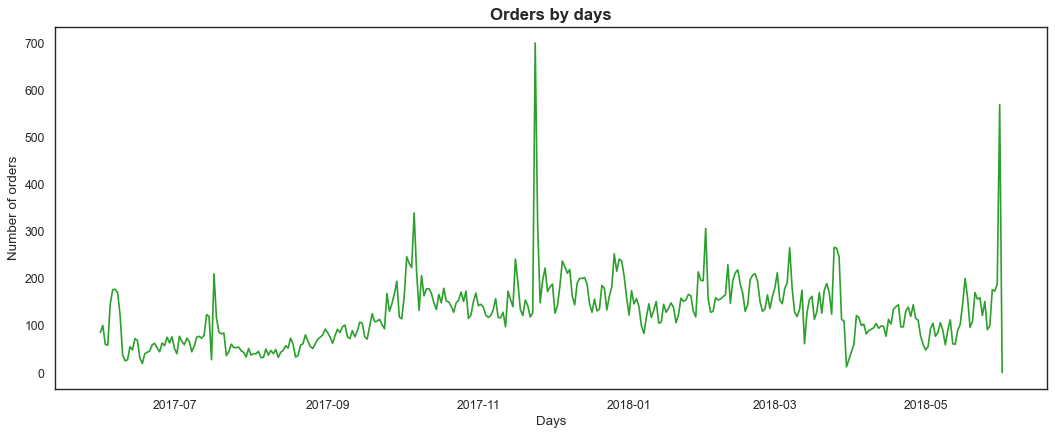

In [69]:
plt.figure(figsize=(16,6), dpi= 80)
plt.plot('date', 'n_orders', data=daily_orders, color='tab:green')
plt.title("Orders by days", fontsize=15, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Number of orders')
plt.show()

In [70]:
buyers = orders.groupby(['Uid']).agg({'Revenue' : 'sum'}).reset_index()

In [71]:
visits_buyers = visits[['Uid', 'Source Id', 'first_activity_month']]
visits_buyers = visits_buyers.drop_duplicates('Uid')

In [72]:
buyers = buyers.merge(visits_buyers, on='Uid', how='left')

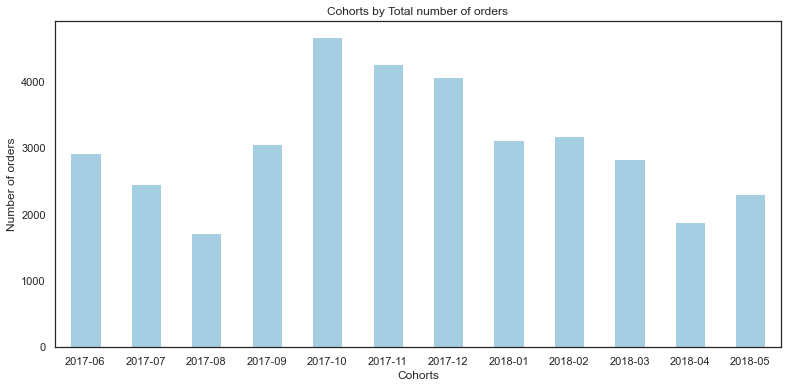

In [73]:
cohorts_by_orders = buyers.groupby('first_activity_month').agg({'Uid': 'nunique'}).reset_index()
cohorts_by_orders['first_activity_month'] = cohorts_by_orders['first_activity_month'].dt.strftime('%Y-%m')
cohorts_by_orders.columns = ['Cohorts', 'Number of Orders']
ax3 = cohorts_by_orders.plot.bar(x='Cohorts', y='Number of Orders', 
                                legend=False, 
                                rot=0, 
                                colormap='Paired', 
                                title='Cohorts by Total number of orders',
                                figsize=(13,6))
plt.xlabel('Cohorts')
plt.ylabel('Number of orders')
plt.show()

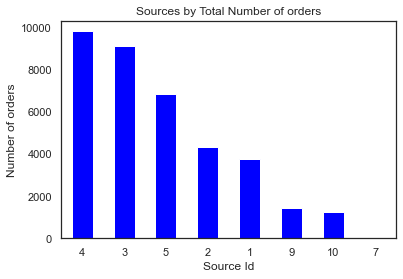

In [74]:
sources_by_orders = buyers.groupby('Source Id').agg({'Uid':'nunique'}).reset_index()
sources_by_orders.columns = ['Source Id', 'Number of Orders']
sources_by_orders['Source Id'] =  sources_by_orders['Source Id'].astype('category')
sources_by_orders.sort_values(by='Number of Orders', ascending=False, inplace=True)
ax = sources_by_orders.plot.bar(x='Source Id', y='Number of Orders', 
                                legend=False, 
                                rot=0, 
                                colormap='winter', 
                                title='Sources by Total Number of orders')
plt.xlabel('Source Id')
plt.ylabel('Number of orders')
plt.show()

In [75]:
round(daily_orders['n_orders'].mean())

128

**128** is the average number of orders per day. In Decemer was tremendous rise (up to 700) which just continues to confirm the up standing interest of users to the service duting winter vacations season.

**3rd and 4th** sources get the most number of orders.

#### Average Purchase Size

In [76]:
print('Average revenue per order:', round(orders['Revenue'].mean()))

Average revenue per order: 5


In [77]:
daily_revenue = orders.groupby(['order_date']).agg({'Revenue': 'mean'}).reset_index()
daily_revenue.columns = ['date', 'revenue']
daily_revenue.head()

,date,revenue
0,2017-06-01,4.056875
1,2017-06-02,2.919910
2,2017-06-03,2.484776
3,2017-06-04,2.957727
4,2017-06-05,2.742174


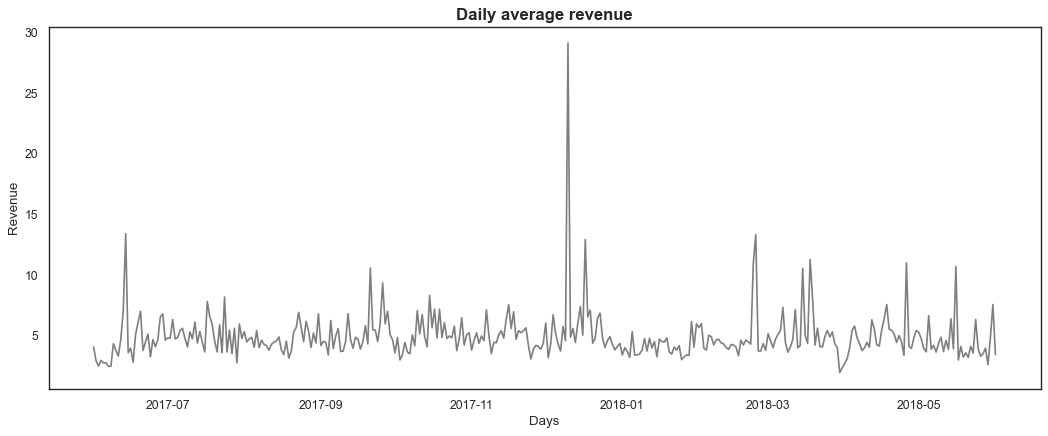

In [78]:
plt.figure(figsize=(16,6), dpi= 80)
plt.plot('date', 'revenue', data=daily_revenue, color='tab:grey')
plt.title("Daily average revenue", fontsize=15, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Revenue')
plt.show()

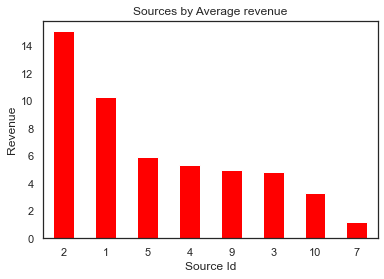

In [79]:
sources_by_revenue = buyers.groupby('Source Id').agg({'Revenue':'mean'}).reset_index()
sources_by_revenue.columns = ['Source Id', 'Revenue']
sources_by_revenue['Source Id'] =  sources_by_revenue['Source Id'].astype('category')
sources_by_revenue.sort_values(by='Revenue', ascending=False, inplace=True)
ax1 = sources_by_revenue.plot.bar(x='Source Id', y='Revenue', 
                                legend=False, 
                                rot=0, 
                                colormap='flag', 
                                title='Sources by Average revenue')
plt.xlabel('Source Id')
plt.ylabel('Revenue')
plt.show()

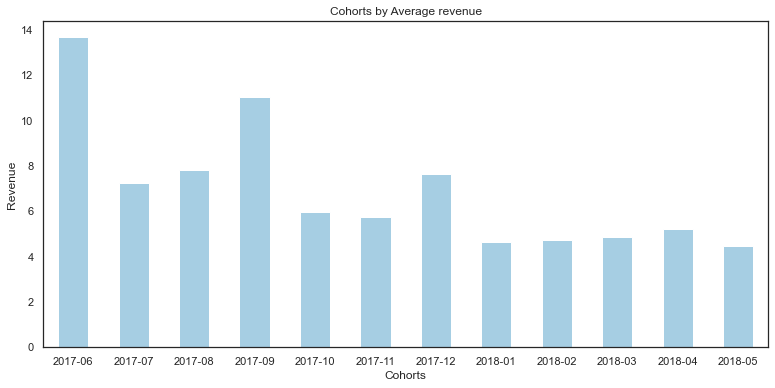

In [80]:
cohorts_by_revenue = buyers.groupby('first_activity_month').agg({'Revenue':'mean'}).reset_index()
cohorts_by_revenue['first_activity_month'] = cohorts_by_revenue['first_activity_month'].dt.strftime('%Y-%m')
#cohorts_by_revenue.columns = ['first_activity_month', 'Revenue']
ax1 = cohorts_by_revenue.plot.bar(x='first_activity_month', y='Revenue', 
                                legend=False, 
                                rot=0, 
                                colormap='Paired', 
                                title='Cohorts by Average revenue',
                                figsize=(13,6))
plt.xlabel('Cohorts')
plt.ylabel('Revenue')
plt.show()

The average daily revenue is **5** in some currency.

The rise in average revnue was in December, in the middle of the summer and in autumn.

**2nd, 1st, 4th and 5th** sources are the most profitable in terms of money.

The oldest cohort June 2017 spent the most on average. But September and December users are also quite profitable ones.

### Lifetime Value

In [81]:
orders['order_month'] = orders['order_date'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]')

In [82]:
first_order = orders.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_order.columns = ['Uid', 'first_order_month']

In [83]:
cohort_sizes = first_order.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2022
1,2017-07-01,1922
2,2017-08-01,1369
3,2017-09-01,2579
4,2017-10-01,4340


In [84]:
orders_ = pd.merge(orders,first_order, on='Uid')
cohorts1 = orders_.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()

In [85]:
report1 = pd.merge(cohort_sizes, cohorts1, on='first_order_month')
report1.head()

,first_order_month,n_buyers,order_month,Revenue
0,2017-06-01,2022,2017-06-01,9557.49
1,2017-06-01,2022,2017-07-01,981.82
2,2017-06-01,2022,2017-08-01,885.34
3,2017-06-01,2022,2017-09-01,1931.30
4,2017-06-01,2022,2017-10-01,2068.58


In [86]:
margin_rate = .6

report1['gp'] = report1['Revenue'] * margin_rate
report1['age'] = (report1['order_month'] - report1['first_order_month']) / np.timedelta64(1, 'M')
report1['age'] = report1['age'].round().astype('int')

In [87]:
report1['ltv'] = report1['gp'] / report1['n_buyers']
output1 = report1.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').round(2)

output1.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.84,0.29,0.26,0.57,0.61,0.44,0.57,0.35,0.33,0.36,0.34,0.15
2017-07-01,3.61,0.2,0.37,0.22,0.11,0.09,0.07,0.09,0.1,0.09,0.09,
2017-08-01,3.17,0.28,0.28,0.23,0.3,0.17,0.13,0.24,0.18,0.11,,
2017-09-01,3.39,0.67,0.31,2.39,0.24,0.39,0.42,0.15,0.11,,,
2017-10-01,3.00,0.32,0.11,0.09,0.09,0.07,0.05,0.07,,,,
2017-11-01,3.10,0.24,0.12,0.2,0.09,0.03,0.07,,,,,
2017-12-01,2.85,0.16,0.56,0.64,0.19,0.2,,,,,,
2018-01-01,2.48,0.18,0.18,0.09,0.04,,,,,,,
2018-02-01,2.49,0.17,0.05,0.04,,,,,,,,


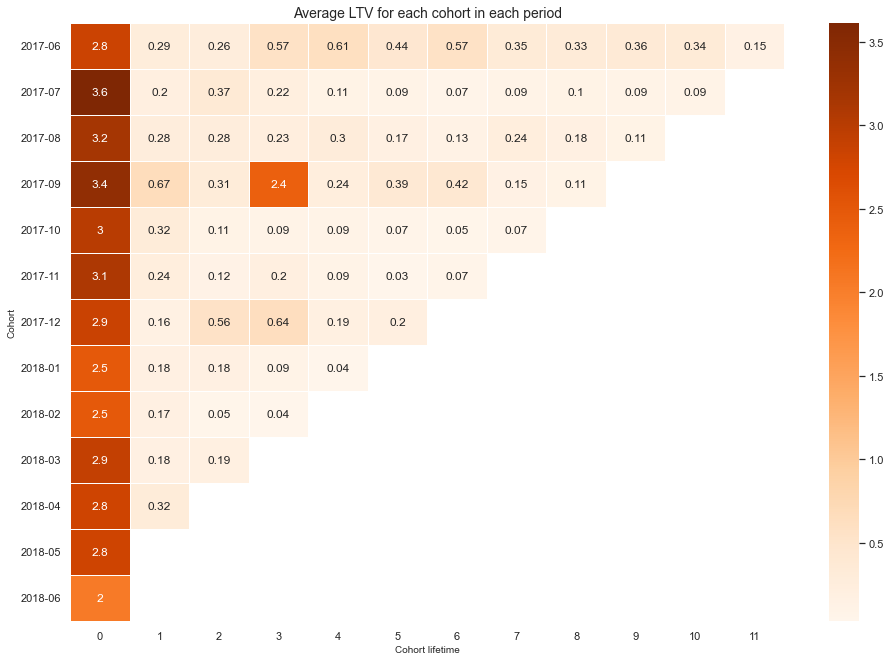

In [88]:
plt.figure(figsize=(16, 11))
sns.heatmap(output1,
            annot=True,
            linewidths=1,
            linecolor='white',
            cmap='Oranges').set_yticklabels(output1.index.strftime('%Y-%m'))
plt.xlabel('Cohort lifetime', fontsize = 10)
plt.ylabel('Cohort', fontsize = 10)
plt.title('Average LTV for each cohort in each period', fontsize = 14)
plt.show()

In [89]:
(report1[report1['first_order_month'] >= '2017-12-01']['Revenue'].sum() / 
 cohort_sizes[cohort_sizes['first_order_month'] >= '2017-12-01']['n_buyers'].sum()).round(2)

5.54

**September** brought the maximum average revenue. **June cohort** (the 'oldest' users) is the most profitable in terms of bringing money.

**5.54** is LTV value per customer for 6 months (since 2017-12-01) after the first purchase.

### Marketing Costs

In [90]:
sources_costs = costs.groupby(['source_id']).agg({'costs' : ('sum', 'mean')})
sources_costs.columns = ['total_costs', 'average_costs']
sources_costs.sort_values(by='total_costs', ascending = False, inplace=True)
sources_costs

,total_costs,average_costs
source_id,,
3,141321.63,389.315785
4,61073.60,168.246832
5,51757.10,142.189835
2,42806.04,117.922975
1,20833.27,57.391928
10,5822.49,16.039917
9,5517.49,15.199697


In [91]:
print('Total costs for all marketing sources:', sources_costs['total_costs'].sum().round(2))

Total costs for all marketing sources: 329131.62


In [92]:
daily_costs = costs.groupby(['dt']).agg({'costs' : ('sum', 'mean')}).reset_index()
daily_costs.columns = ['Date', 'Total', 'Average']
daily_costs.head()

,Date,Total,Average
0,2017-06-01,735.26,105.037143
1,2017-06-02,721.19,103.027143
2,2017-06-03,450.85,64.407143
3,2017-06-04,761.16,108.737143
4,2017-06-05,821.44,117.348571


In [93]:
print('Average daily costs:',round(daily_costs['Average'].mean(), 2))

Average daily costs: 129.17


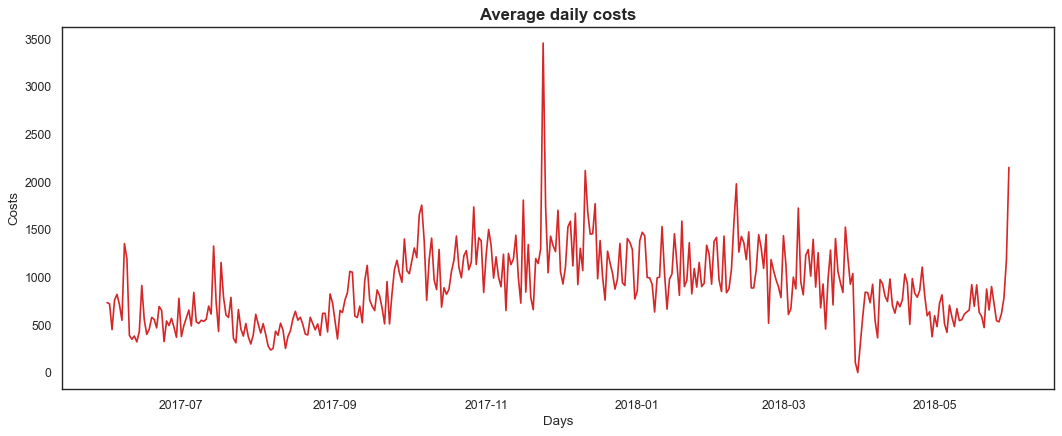

In [94]:
plt.figure(figsize=(16,6), dpi= 80)
plt.plot('Date', 'Total', data=daily_costs, color='tab:red')
plt.title("Average daily costs", fontsize=15, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Costs')
plt.show()


In [95]:
costs['month'] = costs['dt'].values.astype('datetime64[M]')
sources_by_months = costs.pivot_table(index=['month'],
                                      columns='source_id', 
                                      values='costs', 
                                      aggfunc='sum').reset_index()
sources_by_months.columns = ['month', '1', '2', '3', '4', '5', '9', '10']
sources_by_months.head()

,month,1,2,3,4,5,9,10
0,2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
1,2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2,2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
3,2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
4,2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24


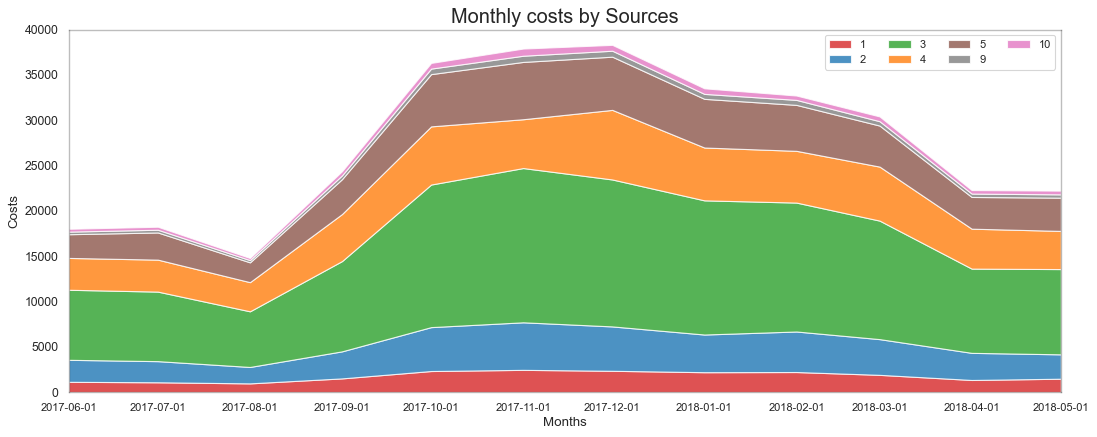

In [97]:
# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 6), dpi= 80)
columns = sources_by_months.columns[1:]
labs = columns.values.tolist()

# Prepare data
x = sources_by_months['month'].astype('O').values.tolist()
y1 = sources_by_months['1'].values.tolist()
y2 = sources_by_months['2'].values.tolist()
y3 = sources_by_months['3'].values.tolist()
y4 = sources_by_months['4'].values.tolist()
y5 = sources_by_months['5'].values.tolist()
y6 = sources_by_months['9'].values.tolist()
y7 = sources_by_months['10'].values.tolist()
y = np.vstack([y1, y2, y3, y4, y5, y6, y7])

# Plot for each column
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.8)

# Decorations
ax.set_title('Monthly costs by Sources', fontsize=18)
ax.set(ylim=[0, 40000])
ax.legend(fontsize=10, ncol=4)
plt.xticks(x[:], fontsize=10, horizontalalignment='center')
plt.xlim(x[0], x[-1])

# Lighten borders
plt.gca().spines["top"].set_alpha(0.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0.3)
plt.gca().spines["left"].set_alpha(.3)
plt.xlabel('Months')
plt.ylabel('Costs')
plt.show()

In total **329131.62** were spent for marketing campaigns in different sources. **129.17** were spent on average daily. Also we see overall monthly rising of expenses.

Afisha spends the most bugdet on the 3rd source both in terms of orders and average money recieved from users.

### Customer Acquisition Costs

In [98]:
source_buyers = buyers.groupby('Source Id').agg({'Uid' : 'nunique'}).reset_index()
source_buyers.columns =['source_id', 'n_users']
source_buyers.head()

,source_id,n_users
0,1,3740
1,2,4320
2,3,9134
3,4,9822
4,5,6838


In [99]:
sources_costs = sources_costs.merge(source_buyers, on='source_id')

In [100]:
sources_costs['cac_source'] = sources_costs['total_costs']/sources_costs['n_users']
sources_costs['cac_source'] = sources_costs['cac_source'].round(2)
sources_costs

,source_id,total_costs,average_costs,n_users,cac_source
0,3,141321.63,389.315785,9134,15.47
1,4,61073.60,168.246832,9822,6.22
2,5,51757.10,142.189835,6838,7.57
3,2,42806.04,117.922975,4320,9.91
4,1,20833.27,57.391928,3740,5.57
5,10,5822.49,16.039917,1239,4.70
6,9,5517.49,15.199697,1415,3.90


In [101]:
print('Average CAC per source:', round(sources_costs['cac_source'].mean(), 2))

Average CAC per source: 7.62


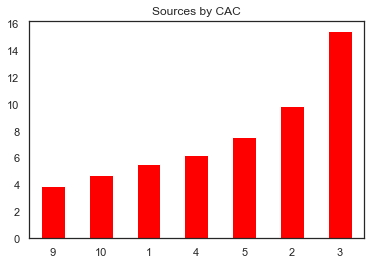

In [102]:
sources_costs.sort_values(by='cac_source', ascending=True, inplace=True)
ax3 = sources_costs.plot.bar(x='source_id', y='cac_source', 
                                legend=False, 
                                rot=0, 
                                colormap='flag', 
                                title='Sources by CAC')
plt.xlabel('')
plt.show()

In [103]:
montlhy_costs = costs.groupby('month')['costs'].sum().reset_index()

In [104]:
report_romi = pd.merge(report1, montlhy_costs, left_on='first_order_month', right_on='month')
report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']

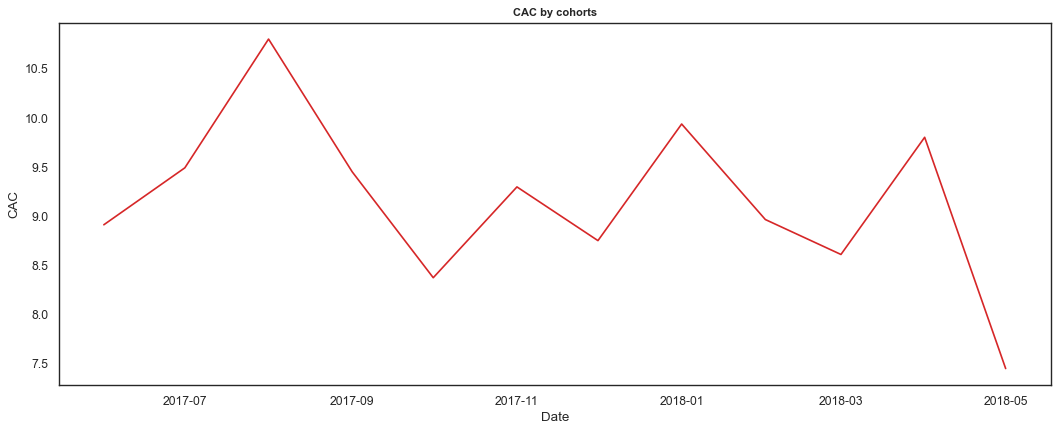

In [106]:
cac_by_cohorts = report_romi.groupby(['first_order_month']).agg({'cac':'mean'}).reset_index()

plt.figure(figsize=(16,6), dpi= 80)
plt.plot('first_order_month', 'cac', data=cac_by_cohorts, color='tab:red')
plt.title("CAC by cohorts", fontsize=10, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('CAC')
plt.show()

**3rd source** is the most expensive source in terms of attracting a user but doesnt provide enough orders and money.
The August cohort seemed to be the most expensive to attract.

### Return on Investment

In [107]:
report_romi.head()

,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv,month,costs,cac
0,2017-06-01,2022,2017-06-01,9557.49,5734.494,0,2.836050,2017-06-01,18015.0,8.909496
1,2017-06-01,2022,2017-07-01,981.82,589.092,1,0.291341,2017-06-01,18015.0,8.909496
2,2017-06-01,2022,2017-08-01,885.34,531.204,2,0.262712,2017-06-01,18015.0,8.909496
3,2017-06-01,2022,2017-09-01,1931.30,1158.780,3,0.573086,2017-06-01,18015.0,8.909496
4,2017-06-01,2022,2017-10-01,2068.58,1241.148,4,0.613822,2017-06-01,18015.0,8.909496


In [108]:
report_romi['romi'] = report_romi['ltv'] / report_romi['cac']
output_romi = report_romi.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output_romi.cumsum(axis=1).round(2)
output_romi.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.318318,0.0327,0.029487,0.064323,0.068895,0.049556,0.06399,0.039186,0.037274,0.040816,0.03849,0.017306
2017-07-01,0.380174,0.021204,0.039441,0.022707,0.011183,0.009871,0.007604,0.008971,0.010199,0.009308,0.009847,
2017-08-01,0.293248,0.026231,0.025481,0.021746,0.027457,0.015758,0.011708,0.022509,0.01624,0.010447,,
2017-09-01,0.358700,0.071021,0.033016,0.252654,0.025455,0.04112,0.044586,0.015452,0.011693,,,
2017-10-01,0.358719,0.038409,0.013721,0.011266,0.010865,0.008629,0.00608,0.008278,,,,
2017-11-01,0.333016,0.025741,0.01289,0.02099,0.009547,0.00348,0.007424,,,,,
2017-12-01,0.325277,0.017871,0.063495,0.073116,0.021478,0.023202,,,,,,
2018-01-01,0.249704,0.017797,0.018372,0.008621,0.003786,,,,,,,
2018-02-01,0.278284,0.018629,0.005256,0.004963,,,,,,,,


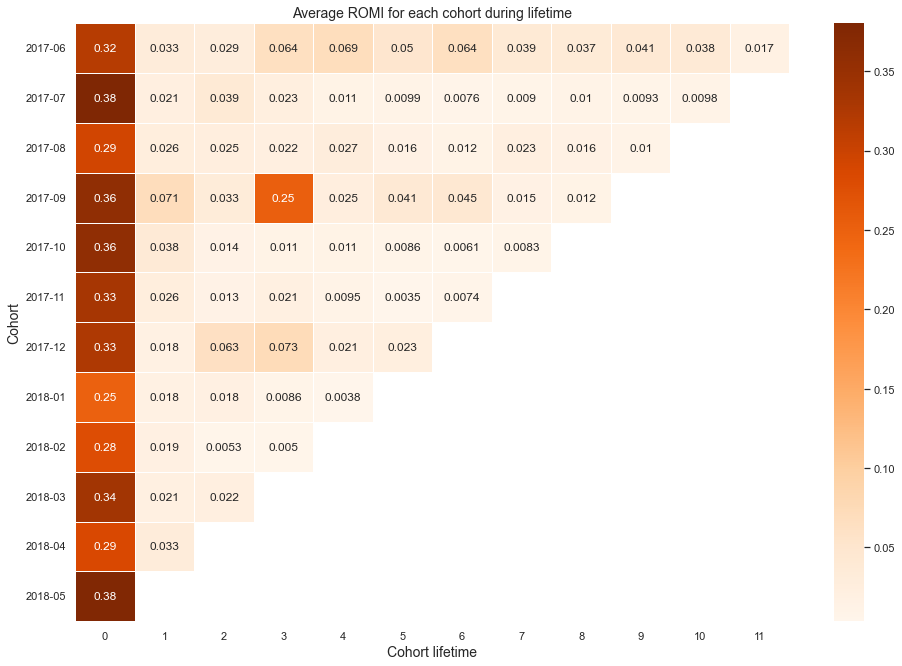

In [112]:
plt.figure(figsize=(16, 11))
sns.heatmap(output_romi,
            annot=True,
            linewidths=1,
            linecolor='white',
            cmap='Oranges').set_yticklabels(output_romi.index.strftime('%Y-%m'))
plt.xlabel('Cohort lifetime', fontsize = 14)
plt.ylabel('Cohort', fontsize = 14)
plt.title('Average ROMI for each cohort during lifetime', fontsize = 14)
plt.show()

In [113]:
sources_by_total_revenue = buyers.groupby('Source Id').agg({'Revenue':'sum'}).reset_index()
sources_by_total_revenue.columns = ['source_id', 'total_revenue']
sources_by_total_revenue

,source_id,total_revenue
0,1,38560.06
1,2,65152.26
2,3,44317.68
3,4,52479.75
4,5,40357.91
5,7,1.22
6,9,7076.98
7,10,4111.34


In [114]:
sources_costs = sources_costs.merge(sources_by_total_revenue, on='source_id')

In [115]:
sources_costs['gp'] = sources_costs['total_revenue'] * margin_rate
sources_costs['ltv'] = sources_costs['gp']/sources_costs['n_users']
sources_costs['romi'] = sources_costs['ltv']/sources_costs['cac_source']

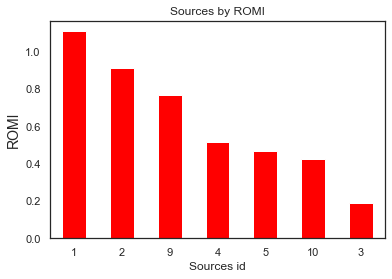

In [117]:
sources_costs.sort_values(by='romi', ascending=False, inplace=True)
ax4 = sources_costs.plot.bar(x='source_id', y='romi', 
                                legend=False, 
                                rot=0, 
                                colormap='flag', 
                                title='Sources by ROMI')
plt.xlabel('Sources id')
plt.ylabel('ROMI', fontsize = 14)
plt.show()

In [118]:
total_revenue = orders['Revenue'].sum()
total_expenses = costs['costs'].sum()
roi = total_revenue*margin_rate / total_expenses
print('ROI with 0.6 margin rate:', '{:.1f}%'.format(100 * (total_revenue*margin_rate / total_expenses)),
      '\n''ROI with 0 margin rate:', '{:.1f}%'.format(100 * (total_revenue / total_expenses)))

ROI with 0.6 margin rate: 45.9% 
ROI with 0 margin rate: 76.6%


The first **June** cohort is the most profitable during the its lifetime. **December** cohort is 'famous' because of its profitability later, in 3 months after joining.

As for sources, the highest ROMI goes to the **1st, 2nd sources**.

## Conclusions

Afisha is quite popular service - almost **1000 daily active users**.
It is usually **one session per user per day**. The sessions are usually short - **1 minute as the most frequent ASL or 5 minutes (median value)**. Important to mention that smartphone users spent more time than desktop.

Retention rate shows how often users come back. As analysis showed, the **most loyal** customers were **June-Jule 2017 cohorts**.

Conversion is important to understand how the users convert from visitors to buyers. I found out that the biggest share of users **(~70%) return on the same day**, but there is still a big share of users who dont convert even after 30 days and more.
For 1000 daily active users we get around 130 orders per day. **1.08 order per user** for the last six months. The rate is not really high but it could be related to the specifity of Afisha service.
**5 dollars** is the average sum of money spent on the source.

LTV shows how much money users can bring in all. The **highest LTV in the first months of service usage** (it corresponds to the conclusion of users returning on the same day for the purchase). Afterwards LTV gradually goes down. **329131 dollars is the total money spent on advertising. 130 dollars are spent daily**.

CAC shows how much does to cost to attract a buyer. The calculations showed that on average for source it is **7.6 dollars** (which exceeds 5-dollar-average purchases) but this values is highly influenced by source type, so we cant say that our campaigns are not effective at all. They are working, but need some improvements. The dynamics of CAC also show the high level of seasonality - Afisha spends more in the periods of low demand.

Around **40% investments return in first month**. The rate is low, but the number of users is high, and working on conversion will increase it.

The dynamics of Afisha using seems to be seasonal - with the **rise in winter and downs during 'mid-season'**.
According to the data received there was significant effort in December (in terms of costs which than led to the rise in users, orders and all). So I would to recommend to take that campaign into the account as soons as it hit the market in a right way.

As for sources **3rd definetely needs revision** - the amount of money invested does not give enough return. I would recommend **1st and 4th** as perspective and effecient in terms of users and profits.